In [94]:
import stellar
import os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [131]:
def select_approriate_xsl_files():
    """extract xsl spectra filenames
    """
    files = os.listdir("stellar_spectra_xsl/XSL_DR3_release")
    files_of_interest = []
    for filename in files:
        if("_merged.fits" in filename):
            files_of_interest.append(filename)

    return files_of_interest

def load_spectrum_fits(filename):
    """loads spectrum fits given filename
    """
    hdul = fits.open("stellar_spectra_xsl/XSL_DR3_release/"+filename)
    data_table = np.array(hdul[1].data.tolist())
    return data_table

def find_range_in_spectrum(wave_min, wave_max, wavelength, spectrum):
    """find subset of spectrum from load_spectrum()
    """
    indexes = np.where((wavelength > wave_min)&(wavelength < wave_max))[0]
    return wavelength[indexes], spectrum[indexes]

def load_spectrum(filename):
    """loads spectrum in numpy given filename
    """
    data_table = load_spectrum_fits(filename)
    wavelengths = data_table[:, 0] #nm
    flux = data_table[:, 1] #erg/s/cm2/Å
    #flux_error = data_table[:, 3]

    return wavelengths, flux

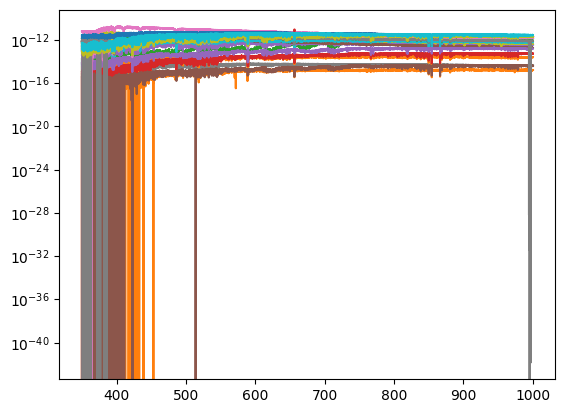

In [133]:
filenames = select_approriate_xsl_files()
filenames = filenames[:20]
for file in filenames:
    spectrum = load_spectrum(file)
    spectrum = find_range_in_spectrum(300, 1000, spectrum[0], spectrum[1])
    plt.plot(spectrum[0], spectrum[1])
plt.yscale('log')